## Unsupervised learning for red wine characteristics

In [1]:
import pandas as pd

wine = pd.read_csv("winequality-red.csv", sep = ';') 
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1. 
Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

/Users/junyinluo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             9.922712          0.413907     0.462881        2.765763   
1             7.382260          0.594430     0.158761        2.406095   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.099900            13.410169             39.388136  0.997689   
1         0.080196            17.316155             50.607532  0.996195   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.201847   0.748237  10.607401  5.894915  
1        3.375005   0.605471  10.315147  5.484638  


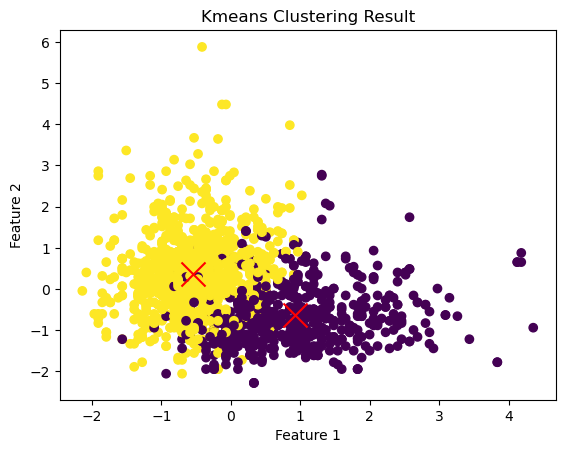

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = wine.drop('quality', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
wine['cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = wine.groupby('cluster').mean()

# Print summary statistics for each cluster
print(cluster_summary)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=wine['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=300, c='red')
plt.title('Kmeans Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The cluster with higher values of wine quality has higher mean values of fixed acidity, citric acid, residual sugar, sulphates, while that with lower values of wine quality has higher mean values of volatile acidity, free sulfur dioxide, total sulfur dioxide, pH.

The most important characteristics that impact the quality of a bottle of wine are the features with most significant difference between the two clusters, that is, fixed acidity, citric acid, free sulfur dioxide and total sulfur dioxide.

### 2. 
Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.


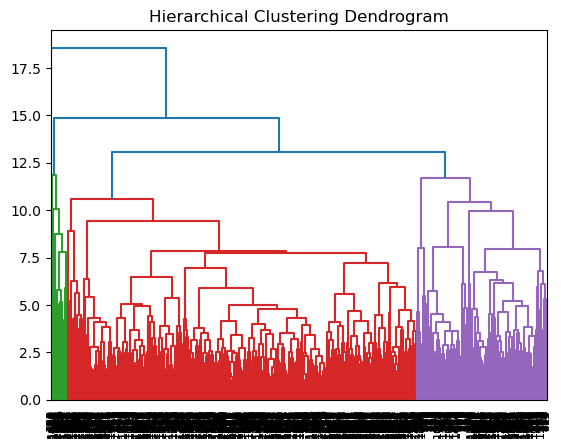

         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
1             8.450000          0.465000     0.880000        2.600000   
2             8.319474          0.527899     0.270213        2.538729   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
1         0.610500            20.000000             57.000000  0.998200   
2         0.086812            15.869756             46.454602  0.996745   

               pH  sulphates    alcohol   quality  
cluster                                            
1        2.900000   1.630000   9.400000  4.500000  
2        3.311628   0.656932  10.424264  5.637445  


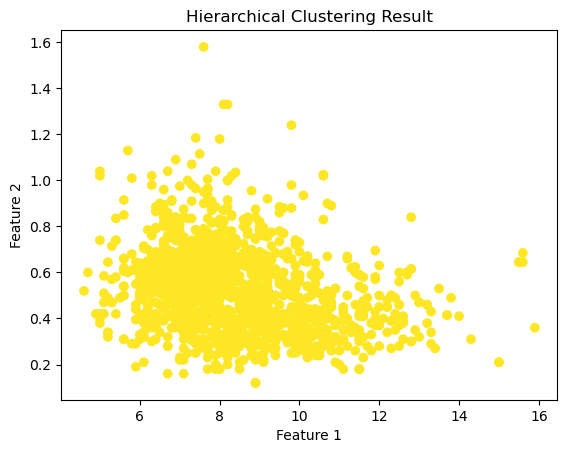

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(X_scaled, method='complete', metric='euclidean')

dendrogram(linkage_matrix, labels=wine.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

num_clusters = 2 
wine['cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

cluster_summary = wine.groupby('cluster').mean()

print(cluster_summary)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=wine['cluster'], cmap='viridis')
plt.title('Hierarchical Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The cluster with higher values of wine quality has higher mean values of volatile acidity, pH and alcohol, while that with lower values of wine quality has higher mean values of citric acid, chlorides, free sulfur dioxide, sulphates.

The most important characteristics that impact the quality of a bottle of wine are the features with significant difference between the two clusters, that is, citric acid, chlorides, free sulfur dioxide, total sulfur dioxide and sulphates.

According to the above discussion, the conclusions obtained by Hierarchical clustering change a lot.

### 3.
Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

Explained Variance Ratio for PC1: 0.28
Explained Variance Ratio for PC2: 0.18


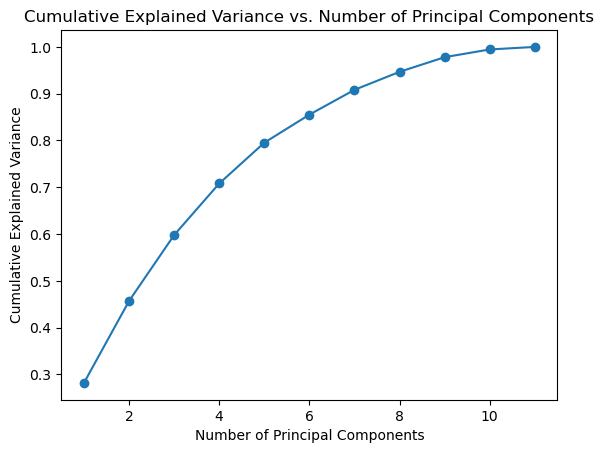

In [4]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained Variance Ratio for PC1: {explained_variance_ratio[0]:.2f}")
print(f"Explained Variance Ratio for PC2: {explained_variance_ratio[1]:.2f}")

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

We can use the first two PCs as predictors and other variable as response to conduct regression analyses.